<h2>Decision Tree</h2>

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree

In [31]:
dataset='Dataset.csv'
df=pd.read_csv(dataset)

In [32]:
df.head()

,Home Owner,Marital Status,Annual Income,Defaulted Borrower
0,Yes,Single,125,No
1,No,Married,100,No
2,No,Single,70,No
3,Yes,Married,120,No
4,No,Divorced,95,Yes


In [33]:
df.shape

(10, 4)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Home Owner          10 non-null     object
 1   Marital Status      10 non-null     object
 2   Annual Income       10 non-null     int64 
 3   Defaulted Borrower  10 non-null     object
dtypes: int64(1), object(3)
memory usage: 448.0+ bytes


In [35]:
d={'Yes':1,'No':0}
df['Home Owner']=df['Home Owner'].map(d)
df['Defaulted Borrower']=df['Defaulted Borrower'].map(d)
d1={'Single':0,'Married':1,'Divorced':2}
df['Marital Status']=df['Marital Status'].map(d1)
df.head()

,Home Owner,Marital Status,Annual Income,Defaulted Borrower
0,1,0,125,0
1,0,1,100,0
2,0,0,70,0
3,1,1,120,0
4,0,2,95,1


In [36]:
df.columns

Index(['Home Owner', 'Marital Status', 'Annual Income', 'Defaulted Borrower'], dtype='object')

In [37]:
X=df[['Home Owner', 'Marital Status', 'Annual Income']]
y=df['Defaulted Borrower']
features=list(df.columns[:3])
print(features)


['Home Owner', 'Marital Status', 'Annual Income']


In [38]:
model=tree.DecisionTreeClassifier(criterion='entropy',splitter='random')
model=model.fit(X.values,y)

To install pydotplus

pip install pydotplus

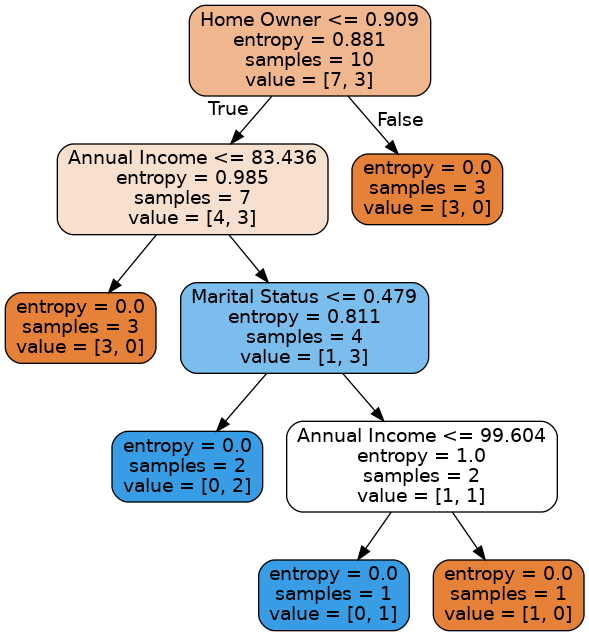

In [39]:
from IPython.display import Image
from six import StringIO
import pydotplus


#Text I/O implementation using an in-memory buffer.
dot_data=StringIO()

#Export a decision tree in DOT format.
#This function generates a GraphViz representation of the decision tree,
#which is then written into `out_file`. Once exported, graphical renderings
#can be generated
tree.export_graphviz(model,out_file=dot_data,feature_names=features,filled=True,rounded=True)

#Load graph as defined by data in DOT format.
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

#Create a PNG/JPEG/GIF image object given raw data.
Image(graph.create_png())

In [40]:
from sklearn.tree import export_text
r = export_text(model, feature_names=features)
print(r)



|--- Home Owner <= 0.91
|   |--- Annual Income <= 83.44
|   |   |--- class: 0
|   |--- Annual Income >  83.44
|   |   |--- Marital Status <= 0.48
|   |   |   |--- class: 1
|   |   |--- Marital Status >  0.48
|   |   |   |--- Annual Income <= 99.60
|   |   |   |   |--- class: 1
|   |   |   |--- Annual Income >  99.60
|   |   |   |   |--- class: 0
|--- Home Owner >  0.91
|   |--- class: 0



In [41]:
df.head()

,Home Owner,Marital Status,Annual Income,Defaulted Borrower
0,1,0,125,0
1,0,1,100,0
2,0,0,70,0
3,1,1,120,0
4,0,2,95,1


# TESTING PREDICT SAMPLE
input [a,b,c]<br>
a = home owner <br>
if 1 = yes<br>
else 0 = no<br>
b = marrital status<br>
if 1 = married<br>
ifelse 2 = divorce<br>
else = single<br>
c = income<br>
value of salary<br>
y (borrower)<br>
if y = 1 mean yes<br>
else y = 0 mean no



In [53]:
model.predict([[0,0,100]])

array([1])